# **Time Series Analysis using Machine Learning**
### **Retno Dewi Yulianti**

Fresh Graduate Academy - Machine Learning IBM

Digital Talent Kominfo 2021

* **Data Source**: https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction
* **Data Set Information**:The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network.
* **Data Set Names**: energydata_complete.csv 

In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import tensorflow as tf
df = pd.read_csv('energydata_complete.csv')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
data = df
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

In [ ]:
data['year_month_date'] = pd.to_datetime(data['date']).dt.date

In [ ]:
data.drop(['date'], axis = 1, inplace = True)

In [ ]:
grouped_data = data.groupby(['year_month_date'], as_index=False).mean()

In [ ]:
grouped_data.head()

,year_month_date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11,136.666667,30.000000,20.808571,46.906210,20.153333,44.793175,20.140972,45.992440,19.492222,47.260813,17.977798,59.011786,5.891607,86.336349,17.604028,43.026925,18.722063,49.363968,16.918175,45.106210,5.922619,735.173810,89.285714,6.083333,40.845238,4.228571,26.248800,26.248800
1,2016-01-12,85.694444,4.236111,20.092326,45.142014,19.307655,43.779733,19.993646,44.933171,19.772778,44.556840,18.011939,50.569078,5.350388,89.505330,17.909869,41.944178,18.753033,49.909097,17.032847,45.680127,5.566319,742.628125,87.500000,5.784722,37.229167,3.596528,25.505072,25.505072
2,2016-01-13,97.013889,5.416667,19.197824,42.867772,18.568513,42.119669,19.609213,43.720891,19.009803,42.315174,17.755966,58.006348,4.979861,75.684838,18.024485,40.436875,18.788722,48.619546,16.953576,44.691476,4.856944,754.790625,83.406250,5.614583,31.559028,2.169792,23.464726,23.464726
3,2016-01-14,151.388889,5.000000,20.372078,42.435191,19.743131,40.699172,20.837581,43.399740,18.694271,43.231053,17.610995,58.117014,3.492367,86.199664,17.946759,40.125689,18.769959,47.299497,16.884815,45.428229,3.431944,749.767361,86.420139,6.277778,35.149306,1.316667,25.264569,25.264569
4,2016-01-15,125.347222,5.972222,22.280949,39.099294,21.528172,38.193897,20.959074,41.409884,19.615127,41.961036,19.026125,52.490274,2.662419,88.423698,18.247612,39.424901,19.225237,46.037401,17.345694,44.534329,2.665278,754.579861,88.385417,7.770833,40.208333,0.849653,26.289515,26.289515


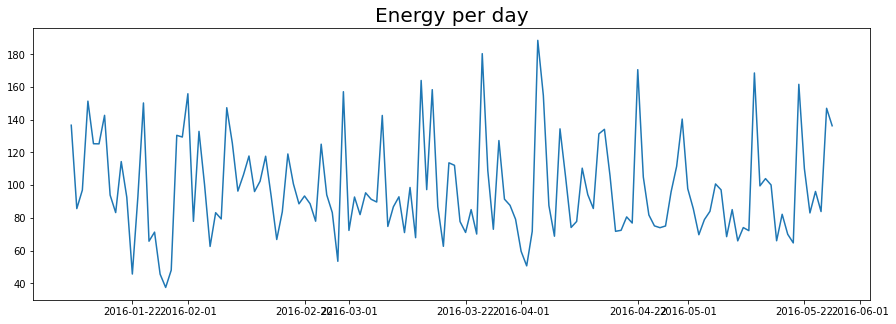

In [ ]:
dates = grouped_data['year_month_date'].values
energy  = grouped_data['Appliances'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, energy)
plt.title('Energy per day',
          fontsize=20);

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
train_set = windowed_dataset(energy, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 96.8816 - mae: 97.3816
Epoch 2/100
1/1 [==============================] - 0s 107ms/step - loss: 96.8765 - mae: 97.3765
Epoch 3/100
1/1 [==============================] - 0s 106ms/step - loss: 96.8669 - mae: 97.3669
Epoch 4/100
1/1 [==============================] - 0s 101ms/step - loss: 96.8545 - mae: 97.3545
Epoch 5/100
1/1 [==============================] - 0s 109ms/step - loss: 96.8411 - mae: 97.3411
Epoch 6/100
1/1 [==============================] - 0s 111ms/step - loss: 96.8274 - mae: 97.3274
Epoch 7/100
1/1 [==============================] - 0s 113ms/step - loss: 96.8133 - mae: 97.3133
Epoch 8/100
1/1 [==============================] - 0s 106ms/step - loss: 96.7988 - mae: 97.2988
Epoch 9/100
1/1 [==============================] - 0s 109ms/step - loss: 96.7836 - mae: 97.2836
Epoch 10/100
1/1 [==============================] - 0s 105ms/step - loss: 96.7676 - mae: 97.2676
Epoch 11/100
1/1 [========================

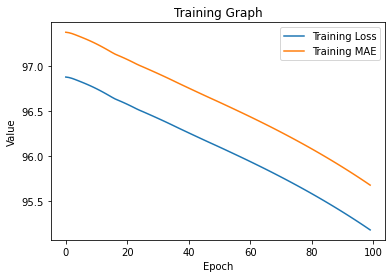

In [ ]:
from matplotlib import pyplot as plt
#loss & mae
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['mae'], label='Training MAE')
plt.title('Training Graph')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

## **Using Callback**

In [ ]:
# Callback: used for end training process if accuracy is convenient
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nFulfilled Accuration.")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
data_timeseries = data.groupby(['year_month_date']).mean()

In [ ]:
data_timeseries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 2016-01-11 to 2016-05-27
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   138 non-null    float64
 1   lights       138 non-null    float64
 2   T1           138 non-null    float64
 3   RH_1         138 non-null    float64
 4   T2           138 non-null    float64
 5   RH_2         138 non-null    float64
 6   T3           138 non-null    float64
 7   RH_3         138 non-null    float64
 8   T4           138 non-null    float64
 9   RH_4         138 non-null    float64
 10  T5           138 non-null    float64
 11  RH_5         138 non-null    float64
 12  T6           138 non-null    float64
 13  RH_6         138 non-null    float64
 14  T7           138 non-null    float64
 15  RH_7         138 non-null    float64
 16  T8           138 non-null    float64
 17  RH_8         138 non-null    float64
 18  T9           138 non-null    float64
 1

In [ ]:
data_timeseries

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
year_month_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11,136.666667,30.000000,20.808571,46.906210,20.153333,44.793175,20.140972,45.992440,19.492222,47.260813,17.977798,59.011786,5.891607,86.336349,17.604028,43.026925,18.722063,49.363968,16.918175,45.106210,5.922619,735.173810,89.285714,6.083333,40.845238,4.228571,26.248800,26.248800
2016-01-12,85.694444,4.236111,20.092326,45.142014,19.307655,43.779733,19.993646,44.933171,19.772778,44.556840,18.011939,50.569078,5.350388,89.505330,17.909869,41.944178,18.753033,49.909097,17.032847,45.680127,5.566319,742.628125,87.500000,5.784722,37.229167,3.596528,25.505072,25.505072
2016-01-13,97.013889,5.416667,19.197824,42.867772,18.568513,42.119669,19.609213,43.720891,19.009803,42.315174,17.755966,58.006348,4.979861,75.684838,18.024485,40.436875,18.788722,48.619546,16.953576,44.691476,4.856944,754.790625,83.406250,5.614583,31.559028,2.169792,23.464726,23.464726
2016-01-14,151.388889,5.000000,20.372078,42.435191,19.743131,40.699172,20.837581,43.399740,18.694271,43.231053,17.610995,58.117014,3.492367,86.199664,17.946759,40.125689,18.769959,47.299497,16.884815,45.428229,3.431944,749.767361,86.420139,6.277778,35.149306,1.316667,25.264569,25.264569
2016-01-15,125.347222,5.972222,22.280949,39.099294,21.528172,38.193897,20.959074,41.409884,19.615127,41.961036,19.026125,52.490274,2.662419,88.423698,18.247612,39.424901,19.225237,46.037401,17.345694,44.534329,2.665278,754.579861,88.385417,7.770833,40.208333,0.849653,26.289515,26.289515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-23,83.055556,2.013889,24.445046,47.025307,22.825978,47.749664,25.801574,42.977436,23.765955,45.311262,23.249119,54.269415,13.586742,32.323524,23.542202,40.136438,24.797500,47.726950,23.096240,46.394452,12.570486,755.849653,84.225694,4.208333,46.017361,9.851736,24.611743,24.611743
2016-05-24,96.180556,4.236111,24.299340,42.112535,22.617992,42.677685,25.368941,39.967807,23.869067,41.552216,23.257430,51.600490,12.988409,16.461977,23.318264,36.075968,24.584043,44.283873,22.765058,42.042955,11.568750,759.007292,76.680556,4.114583,33.975694,7.469097,25.494683,25.494683
2016-05-25,83.888889,2.569444,23.899353,38.929815,22.894673,38.182158,25.038329,38.137895,23.874266,38.582405,20.461186,47.158208,13.720223,17.026792,23.009421,34.845971,24.126673,41.494314,22.147823,39.681940,11.563542,756.887500,74.774306,1.350694,30.739583,6.819097,27.630188,27.630188


In [ ]:
# Data preparation

datatimeseries = data_timeseries['Appliances']

shifted_df= datatimeseries.shift()
concat_df = [datatimeseries, shifted_df]
datanew = pd.concat(concat_df,axis=1)
# Replace NaNs with 0
datanew.fillna(0, inplace=True)

datanew = np.array(datanew)

**Train & Split**

After downsampling, the number of instances is 138. We will split the dataset into train and test data in a 75% and 25% ratio of the instances. (0.75 * 138 = 104)

In [ ]:
train , test = datanew[0:104], datanew[104:]

In [ ]:
# Scale
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [ ]:
# train data
y_train = train_scaled[:,-1]
X_train = train_scaled[:,0:-1]
X_train = X_train.reshape(len(X_train),1,1)

#test data
y_test = test_scaled[:,-1]
X_test = test_scaled[:,0:-1]

In [ ]:
X_test_new =  X_test.reshape(len(X_test),1,1)

In [ ]:
print(X_train.shape, y_train.shape, X_test_new.shape, y_test.shape)

(104, 1, 1) (104,) (34, 1, 1) (34,)


In [ ]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(30, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=['mae'])
# fit network
history = model.fit(X_train, y_train, epochs=50, batch_size=72, verbose=2, validation_data=(X_test_new, y_test), shuffle=False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
2/2 - 3s - loss: 0.1315 - mae: 0.4837 - val_loss: 0.1150 - val_mae: 0.4598
Epoch 2/50
2/2 - 0s - loss: 0.1310 - mae: 0.4827 - val_loss: 0.1142 - val_mae: 0.4581
Epoch 3/50
2/2 - 0s - loss: 0.1302 - mae: 0.4809 - val_loss: 0.1131 - val_mae: 0.4556
Epoch 4/50
2/2 - 0s - loss: 0.1289 - mae: 0.4784 - val_loss: 0.1117 - val_mae: 0.4525
Epoch 5/50
2/2 - 0s - loss: 0.1274 - mae: 0.4753 - val_loss: 0.1101 - val_mae: 0.4490
Epoch 6/50
2/2 - 0s - loss: 0.1257 - mae: 0.4718 - val_loss: 0.1084 - val_mae: 0.4451
Epoch 7/50
2/2 - 0s - loss: 0.1239 - mae: 0.4679 - val_loss: 0.1065 - val_mae: 0.4409
Epoch 8/50
2/2 - 0s - loss: 0.1219 - mae: 0.4638 - val_loss: 0.1046 - val_mae: 0.4365
Epoch 9/50
2/2 - 0s - loss: 0.1199 - mae: 0.4595 - val_loss: 0.1026 - val_mae: 0.4320
Epoch 10/50
2/2 - 0s - loss: 0.1178 - mae: 0.4550 - val_loss: 0.1006 - val_mae: 0.4273
Epoch 11/50
2/2 - 0s - loss: 0.1157 - mae: 0.4504 - val_loss: 0.0986 - val_mae: 0.4226
Epoch 12/50
2/2 - 0s - loss: 0.1136 - mae: 0.4457 - 

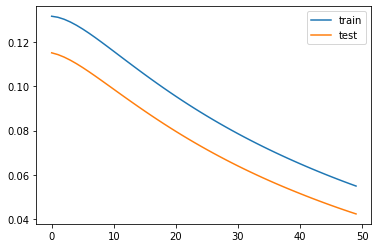

In [ ]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


# **NEW**
---



---



---



In [ ]:
data_new = data

In [ ]:
# Data preparation

data_new = data_new['Appliances']

shifted_df= data_new.shift()
concat_df = [data_new, shifted_df]
data_new = pd.concat(concat_df,axis=1)
# Replace NaNs with 0
data_new.fillna(0, inplace=True)

data_new = np.array(data_new)

In [ ]:
data_new.shape

(19735, 2)

**Train & Split**

After downsampling, the number of instances is 19735. We will split the dataset into train and test data in a 75% and 25% ratio of the instances. (0.75 * 138 = 14801)

In [ ]:
train , test = data_new[0:14801], data_new[14801:]

In [ ]:
# Scale
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [ ]:
# train data
y_train = train_scaled[:,-1]
X_train = train_scaled[:,0:-1]
X_train = X_train.reshape(len(X_train),1,1)

#test data
y_test = test_scaled[:,-1]
X_test = test_scaled[:,0:-1]

In [ ]:
X_test_new =  X_test.reshape(len(X_test),1,1)

In [ ]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(30, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=['mae'])
# fit network
history = model.fit(X_train, y_train, epochs=50, batch_size=72, verbose=2, validation_data=(X_test_new, y_test), shuffle=False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
206/206 - 26s - loss: 0.0083 - mae: 0.0809 - val_loss: 0.0055 - val_mae: 0.0657
Epoch 2/50
206/206 - 1s - loss: 0.0067 - mae: 0.0616 - val_loss: 0.0045 - val_mae: 0.0493
Epoch 3/50
206/206 - 1s - loss: 0.0059 - mae: 0.0506 - val_loss: 0.0039 - val_mae: 0.0401
Epoch 4/50
206/206 - 1s - loss: 0.0054 - mae: 0.0482 - val_loss: 0.0036 - val_mae: 0.0381
Epoch 5/50
206/206 - 1s - loss: 0.0052 - mae: 0.0490 - val_loss: 0.0035 - val_mae: 0.0387
Epoch 6/50
206/206 - 1s - loss: 0.0050 - mae: 0.0505 - val_loss: 0.0034 - val_mae: 0.0399
Epoch 7/50
206/206 - 1s - loss: 0.0049 - mae: 0.0519 - val_loss: 0.0033 - val_mae: 0.0413
Epoch 8/50
206/206 - 1s - loss: 0.0048 - mae: 0.0531 - val_loss: 0.0033 - val_mae: 0.0424
Epoch 9/50
206/206 - 1s - loss: 0.0048 - mae: 0.0541 - val_loss: 0.0033 - val_mae: 0.0433
Epoch 10/50
206/206 - 1s - loss: 0.0048 - mae: 0.0549 - val_loss: 0.0032 - val_mae: 0.0441
Epoch 11/50
206/206 - 1s - loss: 0.0048 - mae: 0.0556 - val_loss: 0.0032 - val_mae: 0.0447
Epoch 1

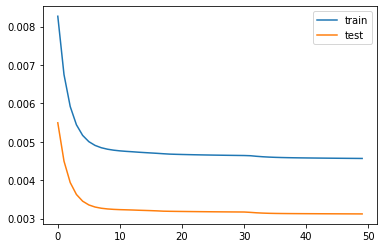

In [ ]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()